# PRACTICE: CREDIT SCORING DATASET
<img src="../images/ml_logo.png" width="200px"/>

## PROBLEM:
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted.<br>

### Data Characteristics
1. `SeriousDlqin2yrs`: Person experienced 90 days past due delinquency or worse
2. `RevolvingUtilizationOfUnsecuredLines`:	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits (Tổng số dư trên thẻ tín dụng và hạn mức tín dụng cá nhân ngoại trừ bất động sản và không có nợ trả góp như khoản vay mua ô tô chia cho tổng hạn mức tín dụng)
3. `age`: Age of borrower in years
4. `NumberOfTime30-59DaysPastDueNotWorse`: Number of times borrower has been 30-59 days past due but no worse in the last 2 years
5. `DebtRatio`: Monthly debt payments, alimony,living costs divided by monthy gross income (Thanh toán nợ hàng tháng, cấp dưỡng, chi phí sinh hoạt chia cho tổng thu nhập hàng tháng)
6. `MonthlyIncome`: Monthly income
7. `NumberOfOpenCreditLinesAndLoans`: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) -> Số khoản vay và thẻ tín dụng
8. `NumberOfTimes90DaysLate`: Number of times borrower has been 90 days or more past due
9. `NumberRealEstateLoansOrLines`: Number of mortgage and real estate loans including home equity lines of credit (Số lượng các khoản vay thế chấp và bất động sản bao gồm hạn mức tín dụng vốn chủ sở hữu nhà)
10. `NumberOfTime60-89DaysPastDueNotWorse`: Number of times borrower has been 60-89 days past due but no worse in the last 2 years
11. `NumberOfDependents`: Number of dependents in family excluding themselves (spouse, children etc.)


### Question
1. Analyze and visualize the datasets
2. Build a simple machine learning model to evaluate credit scoring

## SOLUTION:
### Overall solution
A simple machine learning solution can be splitted into 3 steps:
- Step 1: Prepare data and do the EDA
- Step 2: Build and train a machine learning model
- Step 3: Run the machine learning model with new data

### Step 0: Install and import library
`!conda install -c anaconda scikit-learn -y` <br>

In [1]:
# Standard libraries
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# `sklearn` library used to train and eval model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# `joblib` used to save and load trained model
from joblib import dump, load

### Step 1: Prepare, analyze, and visualize dataset
#### Step 1.1: Prepare credit scoring dataset

In [2]:
# Prepare train data
train_df = pd.read_csv('../data/credit_scoring/train.csv', index_col=0)
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
# Prepare test data
test_df = pd.read_csv('../data/credit_scoring/test.csv', index_col=0)
test_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


#### Step 1.2: EDA (Exploratory Data Analysis)

In [4]:
# Check null value in the data, the datatype, the size of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [8]:
# Another way to check null value in the data
train_df.isnull().sum() / len(train_df) * 100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

In [9]:
# Number of labels in the dataset and number of samples each label
credit_count = train_df.SeriousDlqin2yrs.value_counts()
credit_count

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

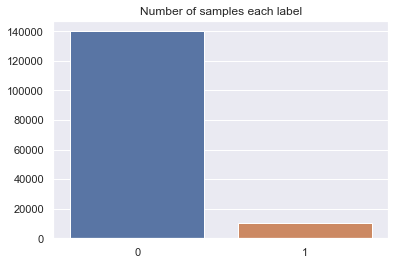

In [10]:
# Plot the barplot
sns.barplot(x=credit_count.index, y=credit_count.values)
plt.title('Number of samples each label')
plt.show()

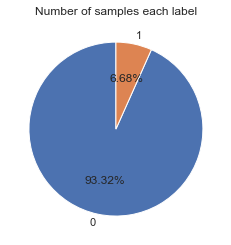

In [11]:
# Plot the pieplot
plt.pie(credit_count.values, labels=credit_count.index, startangle=90, autopct='%.2f%%')
plt.title('Number of samples each label')
plt.show()

In [12]:
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


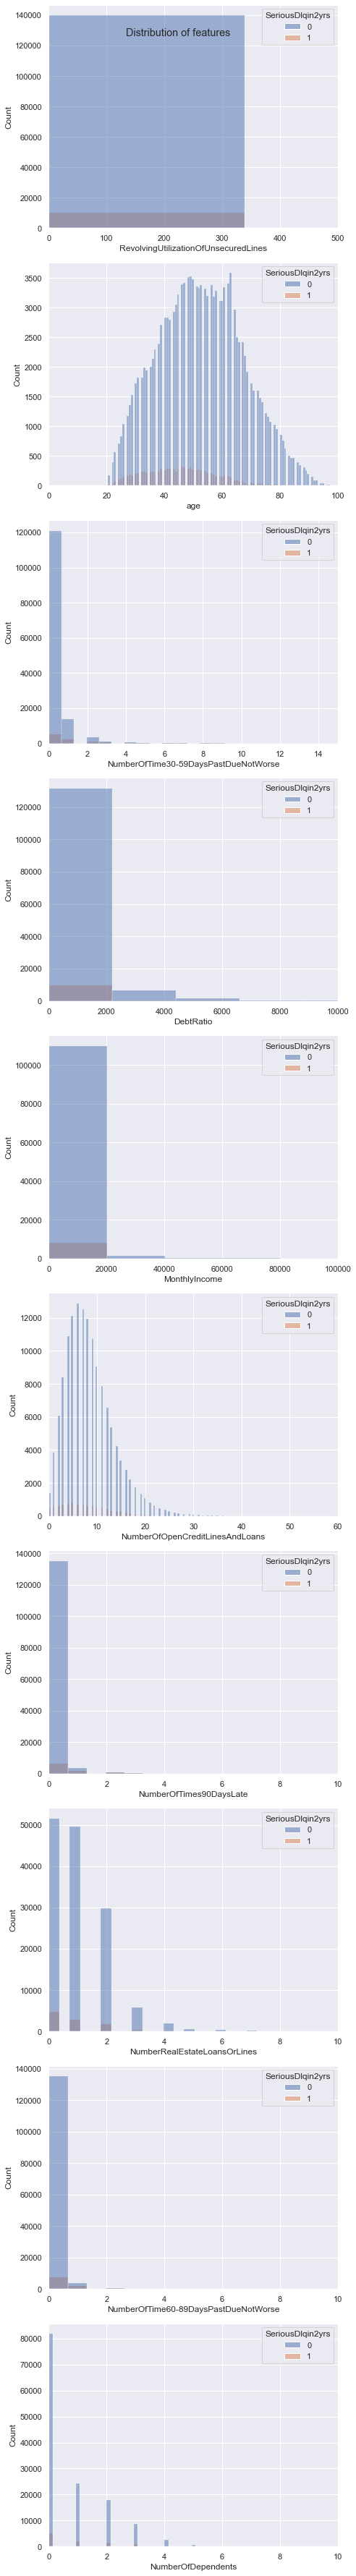

In [14]:
# Plot the distribution of each feature
feature_list = train_df.columns.drop('SeriousDlqin2yrs')
xlim_list = {
    'RevolvingUtilizationOfUnsecuredLines': (0, 500),
    'age': (0, 100),
    'NumberOfTime30-59DaysPastDueNotWorse': (0, 15),
    'DebtRatio': (0, 10_000),
    'MonthlyIncome': (0, 100_000),
    'NumberOfOpenCreditLinesAndLoans': (0, 60),
    'NumberOfTimes90DaysLate': (0, 10),
    'NumberRealEstateLoansOrLines': (0, 10),
    'NumberOfTime60-89DaysPastDueNotWorse': (0, 10),
    'NumberOfDependents': (0, 10),
}
fig, ax = plt.subplots(len(feature_list), 1, figsize=(7, 50))

for index, feature in enumerate(feature_list):
    sns.histplot(ax=ax[index], x=feature, data=train_df, bins=150, kde=False, hue='SeriousDlqin2yrs')
    ax[index].set_xlim(xlim_list[feature])

plt.suptitle('Distribution of features')
plt.tight_layout()
plt.show()

In [15]:
# Statistics of each features
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### Step 1.3: Feature engineering: Handle outliers

In [16]:
def detect_outlier(df, n_outliers):
    outlier_indices = []
    
    for col in df.columns.drop('SeriousDlqin2yrs'):
        # Calculate Q1 (25%)
        q1 = np.percentile(df[col], 25)
        # Calculate Q3 (75%)
        q3 = np.percentile(df[col], 75)
        # Calculate Interquartile - IQR
        iqr = q3 - q1
        # Calculate outlier step
        outlier_step = 1.5 * iqr

        # Determine a list of indice of outlier
        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)].index #conditions
        outlier_indices.extend(outlier_list_col)

    # select records containing more n outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = []
    for index, count in outlier_indices.items():
        if count > n_outliers:
            multiple_outliers.append(index)

    return multiple_outliers

In [19]:
outliers_index_list = detect_outlier(train_df, 2)

In [20]:
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [21]:
train_df = train_df.drop(index=outliers_index_list, axis=0)

In [22]:
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#### Step 1.4: Feature engineering: Handle `null` value

In [23]:
train_df.MonthlyIncome = train_df.MonthlyIncome.fillna(train_df.MonthlyIncome.median())
train_df.NumberOfDependents = train_df.NumberOfDependents.fillna(train_df.MonthlyIncome.median())

In [24]:
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,5416.0,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Step 2: Build and train a machine learning model
#### Step 2.1: Split data into train and test

In [25]:
x_data = train_df.drop(labels=['SeriousDlqin2yrs'], axis=1)
x_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,5416.0,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [26]:
y_data = train_df['SeriousDlqin2yrs'].astype(int)
y_data

1         1
2         0
3         0
4         0
5         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: SeriousDlqin2yrs, Length: 146473, dtype: int64

In [27]:
# Split data into train set and test set
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [28]:
x_train.shape, y_train.shape

((117178, 10), (117178,))

In [29]:
x_val.shape, y_val.shape

((29295, 10), (29295,))

#### Step 2.2: Train model
Detail of parameters used in RandomForest can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [31]:
model = RandomForestClassifier()

In [32]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = model.predict(x_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Step 2.3: Evaluate the model

In [34]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[27409,   187],
       [ 1527,   172]])

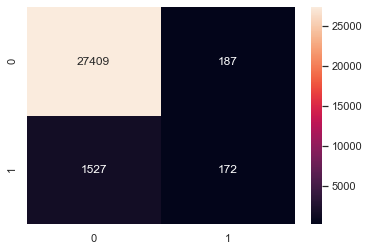

In [35]:
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [36]:
important_features = pd.DataFrame()
important_features['feature'] = x_train.columns
important_features['importance'] = model.feature_importances_
important_features = important_features.sort_values(by='importance', ascending=True)
important_features

,feature,importance
8,NumberOfTime60-89DaysPastDueNotWorse,0.025865
7,NumberRealEstateLoansOrLines,0.036143
2,NumberOfTime30-59DaysPastDueNotWorse,0.044871
9,NumberOfDependents,0.046689
6,NumberOfTimes90DaysLate,0.064102
5,NumberOfOpenCreditLinesAndLoans,0.094981
1,age,0.133882
4,MonthlyIncome,0.159491
3,DebtRatio,0.192105
0,RevolvingUtilizationOfUnsecuredLines,0.201871


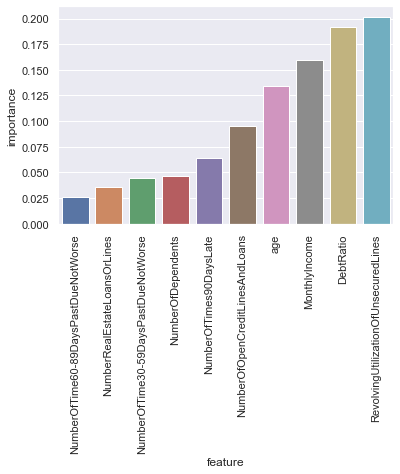

In [37]:
sns.barplot(x=important_features.feature, y=important_features.importance)
plt.xticks(rotation=90)
plt.show()

### Step 3: Run the machine learning model with new data